In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df=pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [32]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [35]:
df.isnull().sum().any()

False

In [36]:
df_copy=df.copy()
df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]]=df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].replace(0,np.NaN)

In [37]:
df_copy.isnull().sum().any()

False

In [38]:
df_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

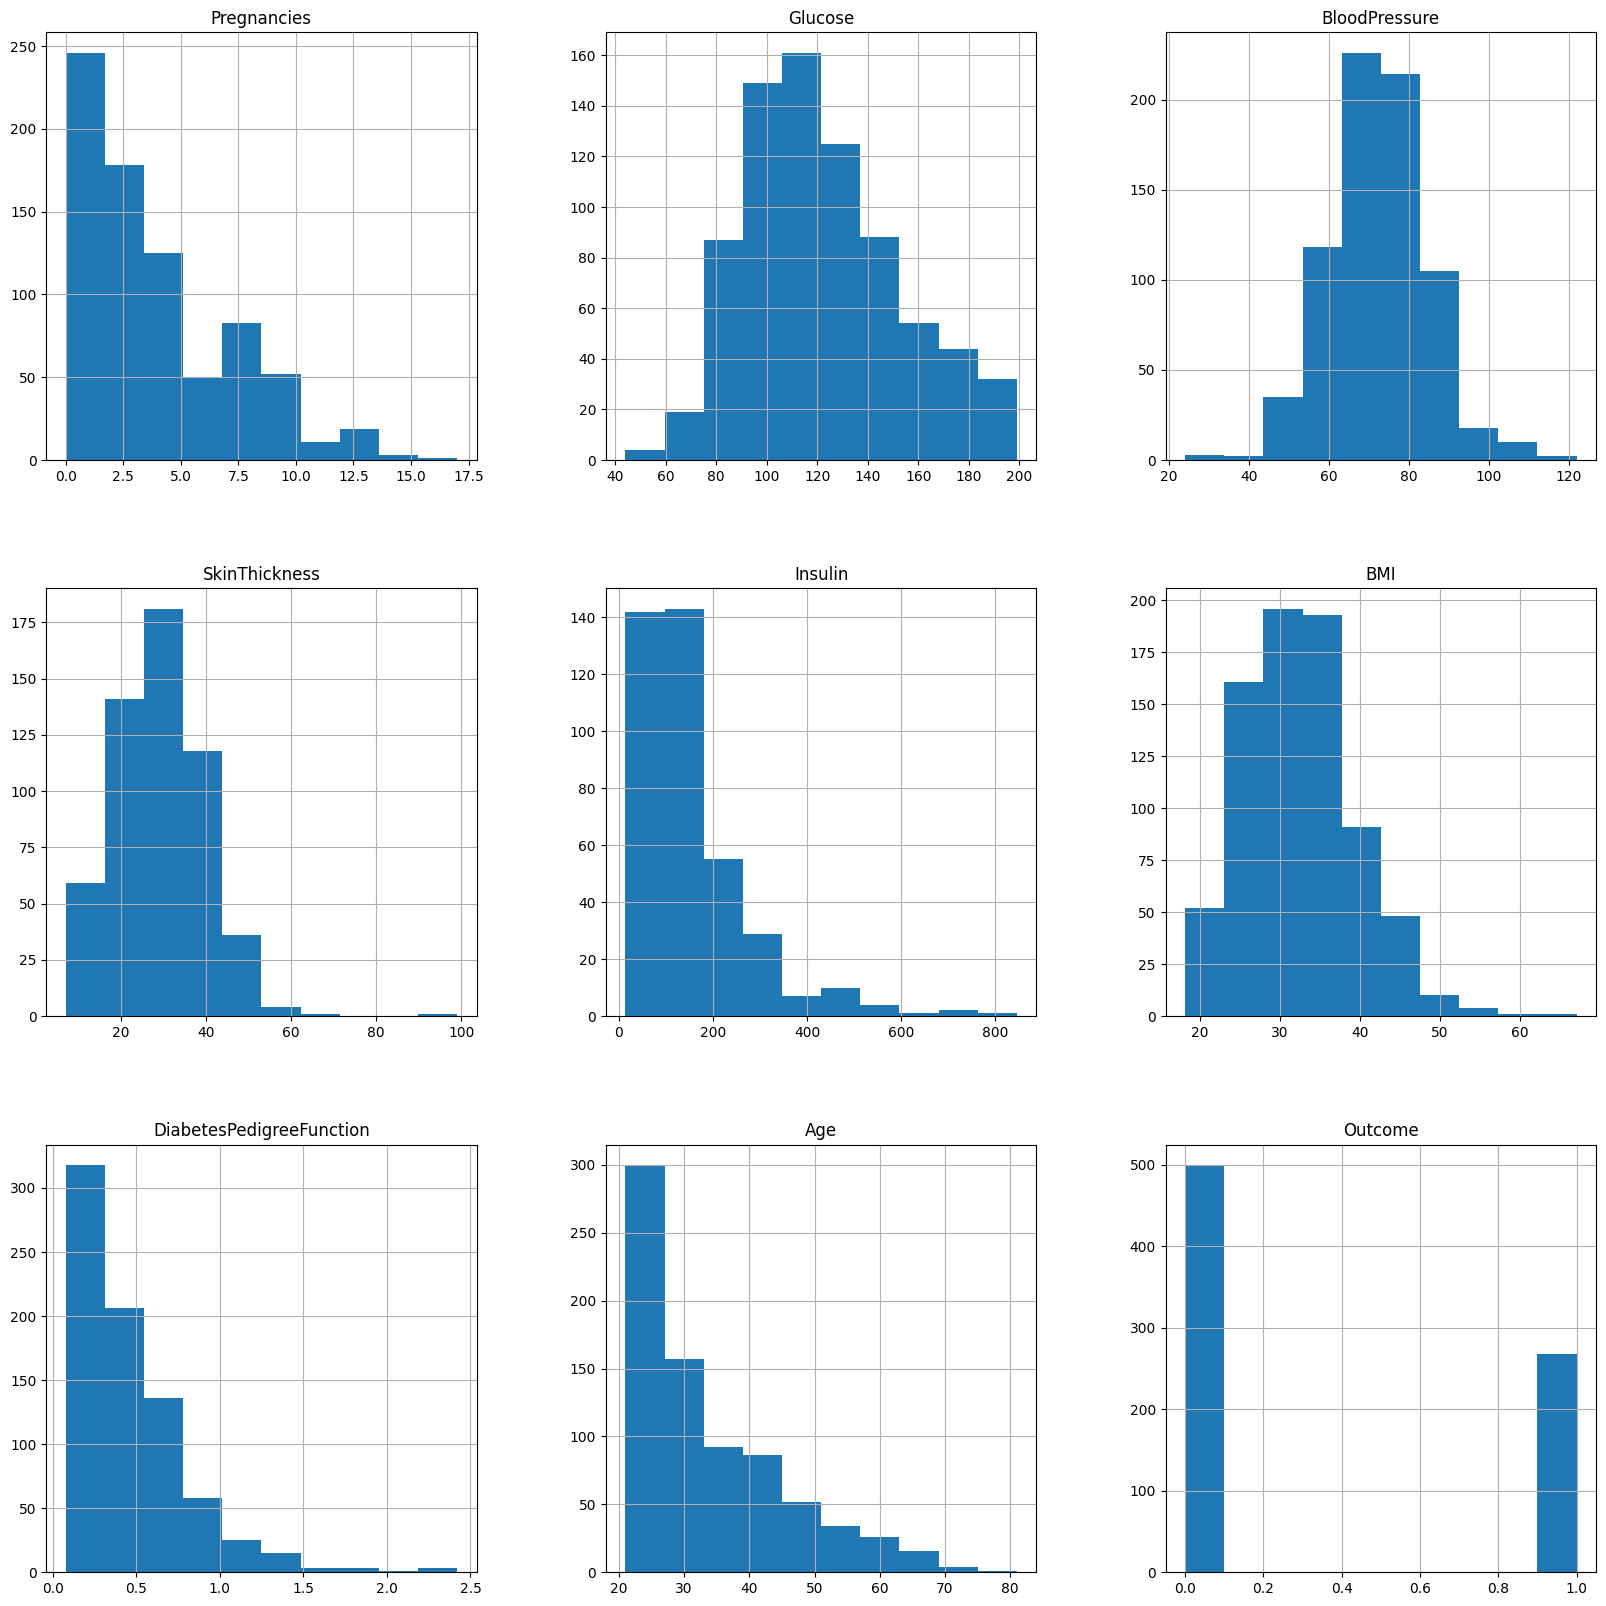

In [39]:
df.hist(figsize=(20,20));

In [40]:
df_copy["Glucose"].fillna(df_copy["Glucose"].mean(),inplace=True)
df_copy["BloodPressure"].fillna(df_copy["BloodPressure"].mean(),inplace=True)
df_copy["SkinThickness"].fillna(df_copy["SkinThickness"].median(),inplace=True)
df_copy["Insulin"].fillna(df_copy["Insulin"].median(),inplace=True)
df_copy["BMI"].fillna(df_copy["BMI"].mean(),inplace=True)

In [41]:
df_copy.isnull().sum().any()

False

In [42]:
x=df_copy.drop("Outcome",axis=1)
y=df_copy["Outcome"]

In [43]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_scaler = ss.fit_transform(x)
df_x = pd.DataFrame(x_scaler,columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [44]:
df_x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df_x,y,test_size=0.3,random_state=42)

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [47]:
knn_model=knn.fit(x_train,y_train)

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

NameError: name 'y_pred' is not defined

In [50]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("\n F1:\n",f1_score(y_test,y_pred))
print("\n Precision score is:\n",precision_score(y_test,y_pred))
print("\n Recall score is:\n",recall_score(y_test,y_pred))
print("\n Confusion Matrix:\n")
print(confusion_matrix(y_test,y_pred))
plt.figure(figsize=(15,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

NameError: name 'y_pred' is not defined

In [51]:
test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)

    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

NameError: name 'X_train' is not defined

In [52]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

ValueError: max() arg is an empty sequence

In [57]:
max_test_score= max(test_scores)
test_scores_ind = [i for i,v in enumarate(test_scores) if v == max_test_score]
print("Max test score {} % and k={}".format(max_test_score*100,list(map(lambda x: x+1, test_scores))))

ValueError: max() arg is an empty sequence

In [58]:
plt.figure(figsize=(12,5))
p=sns.lineplot(range(1,15),train_scores,marker="*",label="Train Score")
p=sns.lineplot(range(1,15),test_scores,marker="o",label="Test Score")

TypeError: lineplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 1200x500 with 0 Axes>